# IIA 2024 - Aprendizaje Automatizado

## Introducción a Jupyter Notebooks y Generación de Datos

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Diagonales

Generar n datos con d inputs:

  - n/2 pertenecientes a la categoría 0. Esta clase corresponde a puntos generados al azar, provenientes de una distribución normal, con centro en el (-1, -1, -1, ... , -1) y matriz de covarianza diagonal, con desviación estándar igual a C * SQRT(d).
  - n/2 pertenecientes a la categoría 1. Esta clase corresponde a puntos generados al azar, provenientes de una distribución normal, con centro en el (1, 1, 1, ... ,1) y matriz de covarianza diagonal, con desviación estándar igual a C * SQRT(d).


In [8]:
def diagonales(n, d, C):
    # Verificar que n sea par para poder dividir los datos equitativamente entre las dos clases
    if n % 2 != 0:
        raise ValueError("n debe ser un número par")

    # Parámetros para la clase 1
    mean1 = np.ones(d)
    cov1 = np.diag([C*C * d] * d)
    
    # Parámetros para la clase 0
    mean0 = -np.ones(d)
    cov0 = np.diag([C*C*d] * d)
    
    # Generar n/2 puntos para cada clase
    datos_clase_1 = np.random.multivariate_normal(mean1, cov1, n//2)
    datos_clase_0 = np.random.multivariate_normal(mean0, cov0, n//2)
    
    # Concatenar los datos y las etiquetas
    datos = np.vstack((datos_clase_1, datos_clase_0))
    
    return datos

Verificamos ahora los datos generados, mostrándolos con matplotlib.pyplot

[1.7247895062339302, 0.4079107239068318, 3.3297875033178057, 2.143520645391453, 1.2497238500807415, 1.646314762783394, 3.9831072264578937, 2.901543907083341, -0.4906221840929803, -1.6794494406443876, 2.7257187165671573, -0.7195250507974327, -0.3519855025299774, 1.5094618847299266, 0.9948284837339737, 1.2021094528901872, 3.5739580108115185, 3.136155631557146, -0.12229674464231466, 0.49885679607518596, 0.3476500464377418, 1.9580408882259452, 1.9712103556458733, 0.5134908236270355, 3.051463936564639, 2.4846925540973377, -0.0686570621987741, 1.3148668602134754, -0.344619406703325, 2.6524054854812666, -0.22551305765002239, -0.19563244351630882, 0.6032343115490029, 0.5208082162780441, 1.0705882604865447, 1.6863460347813983, 1.1262835575671228, 2.4154592596628692, 0.3017222583745244, 2.5428463916519877, 0.8943219263841526, -0.26788353079708815, -1.2823249558065895, 1.0646396256565205, 0.6047863901755798, 1.9975645451846114, 0.5099656995310713, 0.6632475594948708, 1.5824764905143949, 1.6861828

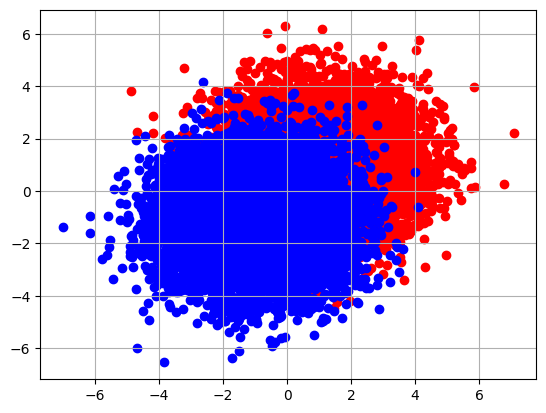

In [13]:
n = 20000
coords = diagonales(n, 2, 1)
#print(diag_df)
# diferenciar entre clase 0 y clase 1
xs0 = [x[0] for x in coords[:n//2]]
xs1 = [x[0] for x in coords[n//2:]]

ys0 = [x[1] for x in coords[:n//2]]
ys1 = [x[1] for x in coords[n//2:]]

print(xs0,xs1)
plt.scatter(xs0, ys0, color='red')
plt.scatter(xs1, ys1, color='blue')
plt.grid(True)
plt.show()

## Paralelas

Igual al punto anterior, pero las distribuciones tienen centro en el ( 1, 0, 0, .... , 0 ) y en el ( -1, 0, 0, .... , 0 ), respectivamente y la desviación estandar es igual a C independientemente de d.

In [4]:
def paralelas(n, d, C):
    # Verificar que n sea par para poder dividir los datos equitativamente entre las dos clases
    if n % 2 != 0:
        raise ValueError("n debe ser un número par")

    # Parámetros para la clase 1
    mean1 = np.zeros(d)
    mean1[0] = 1  # Centro en (1, 0, 0, ..., 0)
    cov1 = np.diag([C] * d)  # Matriz de covarianza diagonal con desviación estándar C
    
    # Parámetros para la clase 0
    mean0 = np.zeros(d)
    mean0[0] = -1  # Centro en (-1, 0, 0, ..., 0)
    cov0 = np.diag([C] * d)  # Matriz de covarianza diagonal con desviación estándar C
    
    # Generar n/2 puntos para cada clase
    n_half = n // 2
    datos_clase_1 = np.random.multivariate_normal(mean1, cov1, n_half)
    datos_clase_0 = np.random.multivariate_normal(mean0, cov0, n_half)
    
    # Etiquetas para cada clase
    etiquetas_clase_1 = np.ones(n_half)
    etiquetas_clase_0 = np.zeros(n_half)
    
    # Concatenar los datos y las etiquetas
    datos = np.vstack((datos_clase_1, datos_clase_0))
   
    return datos

[1.8887812719399184, 1.188966315915133, 1.2469807752548332, -0.03083866080666664, 1.4429873483196312, 2.380189359347045, 1.2282151355021178, 0.838825499848024, 0.668750545830982, 2.101597169705149, 0.30592926667171005, 1.1022240145480042, 2.200573775318187, 1.2470818016774219, 1.2328585997050916, 0.7751253644742655, 0.2942712724821165, 2.1533544831756632, 0.3574238523628901, 2.0683333252425795, 1.4430219507973192, -0.15213519119758967, 1.1420242219500572, 0.3272655460137044, 0.6374112495859766, 0.6810392510620036, 0.9055019631674022, -0.6263152265488205, -0.22638146376683443, 0.7488621240773868, 1.1841884999295567, 0.8376320953573444, 0.5574927866885551, -0.03840845022304351, 1.6510568105922332, 2.1350135409791187, 1.5092135452998265, 0.4379134906107466, 0.9260225545243519, -0.3036569163650211, 1.5738390002516065, 1.6459065389574534, 1.6927829743138472, 0.5236181184827222, 1.5518158690710888, 2.045627078341493, 1.9801875540045466, 0.7998287299680652, 1.2565025878706984, 1.5866024170162

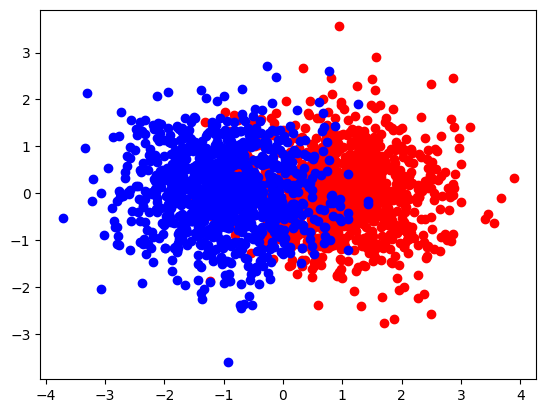

In [5]:
n = 2000
diag_df = paralelas(n, 2, 0.75)
#print(diag_df)
# diferenciar entre clase 0 y clase 1
xs0 = [x[0] for x in diag_df[:n//2]]
xs1 = [x[0] for x in diag_df[n//2:]]

ys0 = [x[1] for x in diag_df[:n//2]]
ys1 = [x[1] for x in diag_df[n//2:]]

print(xs0,xs1)
plt.scatter(xs0, ys0, color='red')
plt.scatter(xs1, ys1, color='blue')
plt.show()

## Espirales

Generar n datos. De los n puntos generados, n/2 deben pertenecer a cada clase.

Los datos tienen 2 inputs, x e y, que corresponden a puntos generados al azar con una distribución UNIFORME (en dicho sistema de referencia x-y) dentro de un circulo de radio 1.

El output es binario, correspondiendo la clase 0 a los puntos que se encuentran entre las curvas ro = theta/4pi y ro = (theta + pi)/4pi (en polares) y la clase 1 al resto.

In [48]:
def espirales(n):
    # Verificar que n sea par para poder dividir los datos equitativamente entre las dos clases
    if n % 2 != 0:
        raise ValueError("n debe ser un número par")

    angles = np.random.uniform(0, 2*np.pi, n)
    radii = np.sqrt(np.random.uniform(0, 1, n))

    # Convert to Cartesian coordinates
    x_coords = radii * np.cos(angles)
    y_coords = radii * np.sin(angles)

    # Generar n/2 puntos para cada clase
    n_half = n // 2
    
    # Etiquetas para cada clase
    clase_0 = []
    clase_1 = []
    
    for i in range(n):
        theta = angles[i]
        ro = radii[i]
        if (theta / (4 * np.pi)) <= ro <= ((theta + np.pi) / (4 * np.pi)):
            clase_1.append((x_coords[i], y_coords[i]))
        elif ((2*np.pi+theta) / (4 * np.pi)) <= ro <= ((theta + 3*np.pi) / (4 * np.pi)):
            clase_1.append((x_coords[i], y_coords[i]))
        elif ((-2*np.pi+theta) / (4 * np.pi)) <= ro <= ((theta - np.pi) / (4 * np.pi)):
            clase_1.append((x_coords[i], y_coords[i]))
        else: clase_0.append((x_coords[i], y_coords[i]))

    return (clase_0, clase_1)

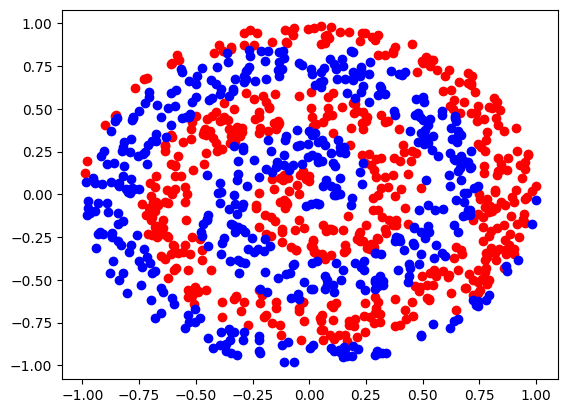

In [88]:
n = 1000
clase_0, clase_1 = espirales(n)

x_clase_0 = [x[0] for x in clase_0]
y_clase_0 = [x[1] for x in clase_0]

x_clase_1 = [x[0] for x in clase_1]
y_clase_1 = [x[1] for x in clase_1]

plt.scatter(x_clase_0, y_clase_0, color='red')
plt.scatter(x_clase_1, y_clase_1, color='blue')
plt.show()